# Orders - Multivariate Regression of  the `review_score`

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from olist.order import Order
orders = Order().get_training_data(with_distance_seller_customer=True)

Based on our correlation matrix down below 👇, we can notice that `review_score` is mostly correlated with  two features : `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated with each other. 

So, `statsmodels` will be used to distinguish the effect of one feature, **holding the other features constant**.

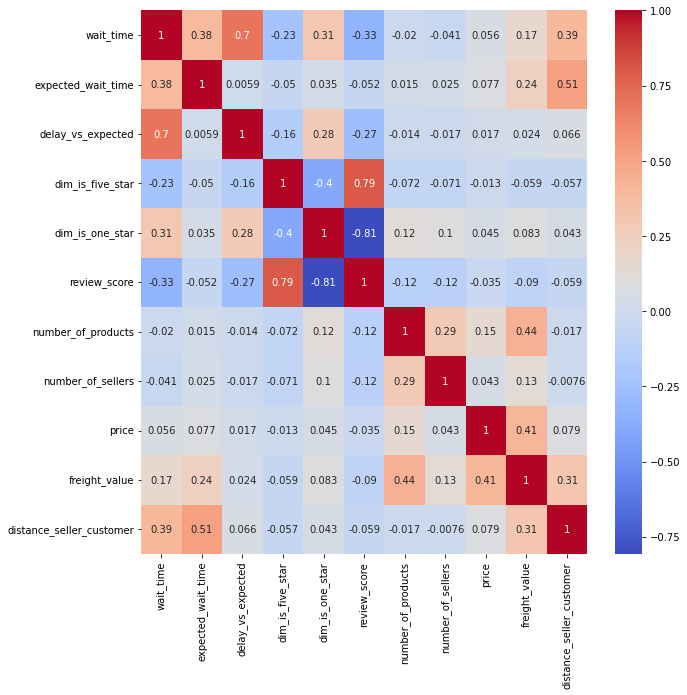

In [7]:
plt.figure(figsize = (10,10))

sns.heatmap(orders.corr(), 
            cmap='coolwarm', 
            annot = True, 
            annot_kws={"size": 10});

## 1 - Univariate regression

❓[statsmodels](https://www.statsmodels.org/stable/generated/statsmodels.formula.api.ols.html) is used with `statsmodels.formula.api` to quickly make
 - `model1`: an ols regression of `review_score` over `wait_time`
 - `model2`: an ols regression of `review_score` over `delay_vs_expected`

For each, the `summary` table is shown and the results are analyzed:
- To check how these results match those of the seaborn regplot
- The regression performance metric `R-squared`, `individual regression coefficients`, `t-values`, `p-values`, and `95% confidence intervals` are calculated and read

***Model 1***:

In [8]:
import statsmodels.formula.api as smf

In [9]:
model1 = smf.ols(formula = 'review_score ~ wait_time', data=orders).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                 1.203e+04
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:42   Log-Likelihood:            -1.5442e+05
No. Observations:               95872   AIC:                         3.088e+05
Df Residuals:                   95870   BIC:                         3.089e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7020      0.006    742.206      0.000       4.690       4.714
wait_time     -0.0454      0.000   -109.678      0.000      -0.046      -0.045
==============================================================================
Omnibus:                    19550.021   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35437.440
Skew:                          -1.301   Prob(JB):                         0.00
Kurtosis:                       4.451   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Model 2***:

In [10]:
model2 = smf.ols(formula = 'review_score ~ delay_vs_expected', data=orders).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     7599.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:42   Log-Likelihood:            -1.5643e+05
No. Observations:               95872   AIC:                         3.129e+05
Df Residuals:                   95870   BIC:                         3.129e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.2114      0.004   1040.808      0.000       4.203       4.219
delay_vs_expected    -0.0750      0.001    -87.171      0.000      -0.077      -0.073
==============================================================================
Omnibus:                    20656.344   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49403.286
Skew:                          -1.206   Prob(JB):                         0.00
Kurtosis:                       5.559   Cond. No.                         4.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two features is the most explicative for the low `review_score`?

For that purpose, OLS model `model3` is set to run with both `wait_time` and `delay_vs_expected` as the features (independent variables), and `review_score` is the target (dependent variable)

***Model 3***:

In [11]:
model3 = smf.ols(formula = 'review_score ~ delay_vs_expected + wait_time', data=orders).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     6178.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:42   Log-Likelihood:            -1.5427e+05
No. Observations:               95872   AIC:                         3.086e+05
Df Residuals:                   95869   BIC:                         3.086e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.6337      0.007    618.575      0.000       4.619       4.648
delay_vs_expected    -0.0201      0.001    -17.030      0.000      -0.022      -0.018
wait_time            -0.0384      0.001    -66.389      0.000      -0.040      -0.037
==============================================================================
Omnibus:                    19980.807   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            40309.882
Skew:                          -1.250   Prob(JB):                         0.00
Kurtosis:                       4.959   Cond. No.                         30.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----
👉 Our multivariate regression allows us to isolate the impact of one feature, while controlling the effect of other features. These new coefficients are called **`partial correlation coefficients`**. 

❓The difference with the **simple regression** coefficients computed with *seaborn* above are as below:


- Holding `wait_time` constant, each additional day of `delay` reduces the review_score on average by 0.0205 [0.023 - 0.018] points
- Holding `delay` constant, each additional day of `wait_time` reduces the review_score on average by 0.0383 [0.039 - 0.037] points

Contrary to what was found with the simple bivariate correlation analysis, `delay` is actually less impactful than `wait_time` in driving lower `review_score`! This exactly demonstrates the importance of multi-variate regression to remove the potential impact of confounding factors

---
❌ R-squared is quite low: no more than 12% of the variations of review_score is explained by the combined variations of `wait_time` and `delay_vs_expected`. 

✅ More features are added into the regression to improve the explainability of the linear regression.

👉 A new OLS `model4` with more features from the `orders` dataset is created.
- ⚠️ No features that are directly derived from the `review_score` are added to prevent **data leakage**
- ⚠️ Two features perfectly colinear with each other will not be added
- ⚖️ Each feature $X_i$ will be transform into its respective z-score $Z_i = \frac{X_i - \mu_i}{\sigma_i}$ in order to compare the partial regression coefficients $\beta_i$ with the correct dimension. Otherwise, comparing the $\beta_i$ will be comparing apples (e.g. "review_stars per day") with oranges (e.g. "review_stars per BRL")!

📝 <u>Note</u>: a **`Multivariate Linear Regression`** is also called an **`Ordinary Least Squares`** method because the aim of the model is to minimise the **`MSE Mean Squared Errors`**

***Model 4***:

In [12]:
base_cal = list(orders.columns[1:4]) + list(orders.columns[5:])
normalize = (orders[base_cal] - orders[base_cal].mean())/orders[base_cal].std()
normalize.head(3)

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
0,-0.428002,-0.955662,-0.160462,-1.204841,-0.328964,-0.121008,-0.264595,-0.112544,-0.513802,-0.652038,-0.979475
1,0.100519,-0.499255,-0.160462,-1.204841,-0.328964,-0.121008,-0.264595,-0.112544,-0.086640,0.000467,0.429743
2,-0.322297,0.299456,-0.160462,0.829977,-0.328964,0.657133,-0.264595,-0.112544,0.111748,-0.164053,-0.145495


In [13]:
model4 = smf.ols(formula = 'review_score ~ delay_vs_expected + wait_time + number_of_products + number_of_sellers + price + freight_value', data=normalize).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     2619.
Date:                Mon, 12 Sep 2022   Prob (F-statistic):               0.00
Time:                        20:56:42   Log-Likelihood:            -1.2876e+05
No. Observations:               95872   AIC:                         2.575e+05
Df Residuals:                   95865   BIC:                         2.576e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.095e-16      0.003  -3.66e-14      1.000      -0.006       0.006
delay_vs_expected     -0.0656      0.004    -15.450      0.000      -0.074      -0.057
wait_time             -0.2983      0.004    -68.836      0.000      -0.307      -0.290
number_of_products    -0.1115      0.003    -32.121      0.000      -0.118      -0.105
number_of_sellers     -0.1014      0.003    -32.388      0.000      -0.108      -0.095
price                 -0.0062      0.003     -1.892      0.058      -0.013       0.000
freight_value          0.0263      0.004      7.088      0.000       0.019       0.034
==============================================================================
Omnibus:                    18835.944   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38374.292
Skew:                          -1.175   Prob(JB):                         0.00
Kurtosis:                       5.020   Cond. No.                         2.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---
❓ Overall regression performance is shown as in bar chart below. It is used to show how has the overall regression performance changed and if this regression statistically significant.

In [14]:
model4.params.values

array([-1.09531524e-16, -6.56327805e-02, -2.98289628e-01, -1.11461993e-01,
       -1.01373286e-01, -6.21725908e-03,  2.63447811e-02])

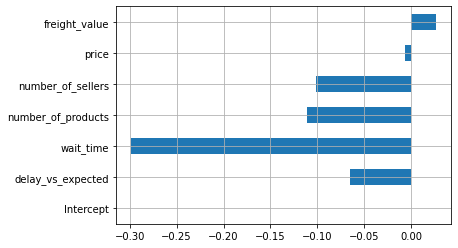

In [15]:
ax = model4.params.plot.barh(rot=0)
ax.grid()

<summary>- 💡Explanations as the graph above 💡 -</summary>
    

- `wait_time` is the biggest explanatory variable
- The more `products` and `sellers` there are for a single order, the lower the `review_score` seems to be
- Distance also plays a role in customers' satisfaction.
- Depending on choice of feature, it might not be possible to conclude anything about `price` and `freight_value` if their p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics are much greater than 1 (at least one feature has a very low p-value)

- R-squared hasn't increased by much. Most of the explanability of `review_score` lies outside of the orders dataset.

⚠️ Low R-squared is common when the number of observations (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant



## 3 - Check model performance

⚠️ Regression performance are not only measured by its R-squared but also visualize the distribution of the predictions, and especially the residuals.

❓ The residuals are computed and found that the mean of the residuals is equal to 0 (always verified in a linear regression context)

In [16]:
model4.resid.mean()

2.647340883819132e-16

In [17]:
# model mean squared error
model4.mse_resid

0.8592163936938302

🧮 The associated RMSE is then calculated. 

In [18]:
from statsmodels.tools.eval_measures import rmse

In [19]:
ypred = model4.predict(normalize)
y = normalize['review_score']

answer = rmse(y,ypred)
answer

0.9269054206616772

📊 The `residuals` are plotted in a histogram.

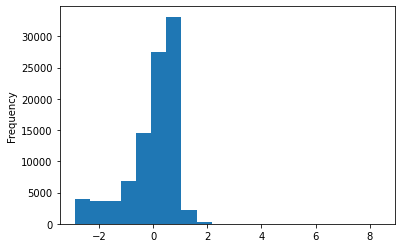

In [20]:
model4.resid.plot.hist(bins=20);

👉 The histogram above has a weird shape, so we'll further analyze this by adding the distribution of the `review_score` and the distribution of the`predicted_review_score` both onto the same graph.

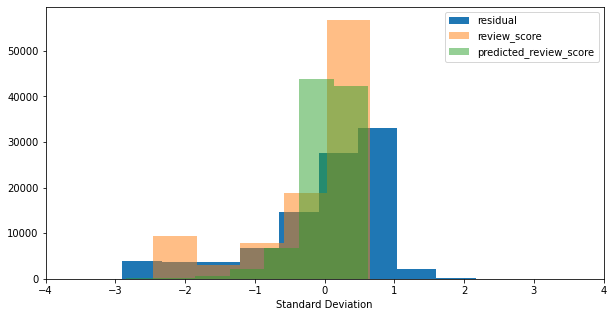

In [30]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(model4.resid, label='residual', bins=20)
ax.hist(normalize['review_score'], alpha=0.5, label='review_score', bins=5)
ax.hist(ypred, alpha = 0.5, label='predicted_review_score', bins=20)
ax.set_xlabel("Standard Deviation")
ax.set_xlim(-4,4)
ax.legend();

📈 Actually, using `seaborn`, we could have already plot a `regression line` of the `review_score` vs. the `delay_vs_expected`

Do it once with a sub-`sample` of the population, and once with the `entire population`.

Text(0.5, 1.0, 'Graph for Sample Population (100)')

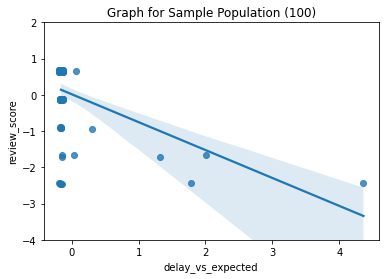

In [26]:
plot1 = sns.regplot(x='delay_vs_expected', y='review_score', data = normalize.sample(100), x_jitter=0.03, y_jitter =0.03)
plot1.set(ylim=(-4,2));
plot1.set_title("Graph for Sample Population (100)")

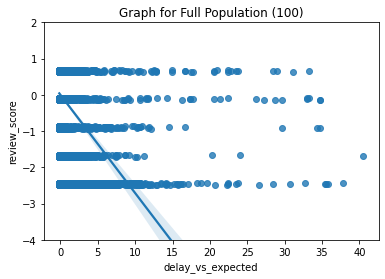

In [28]:
plot2 = sns.regplot(x='delay_vs_expected', y='review_score', data = normalize, x_jitter=0.03, y_jitter =0.03)
plot2.set(ylim=(-4,2));
plot2.set_title("Graph for Full Population (100)");

☝️ It is hard to regress the `review_score` of an order vs. its `wait_time`. because the `review_score` is a discrete number that could also be interpreted as a category: 1 (very bad), 2 (bad), 3 (average), 4 (good), 5 (excellent).

📅 Next, the `Logistic Regression` will be used for `Classification Algorithm` to see if it could be a better alternative model

☝️ So in the end, current model is not so great, for two reasons:
- First, because there is don't have enough features to explain a significant proportion of the review_scores (low R-squared)
- Second, because we are trying to fit a "linear regression" function to a discrete classification problem

💡 So instead on working on individual orders and trying to explain their discrete `rewiew_score` based on the `wait_time`, we will focus our analysis on the sellers' level, aggregating the orders by sellers in the next challenge.